In [35]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [37]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [38]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [39]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [40]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

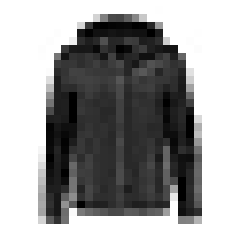

In [41]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [42]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [43]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [44]:
num_classes = len(class_names)

Możemy narysować więcej przykładów treningowych.

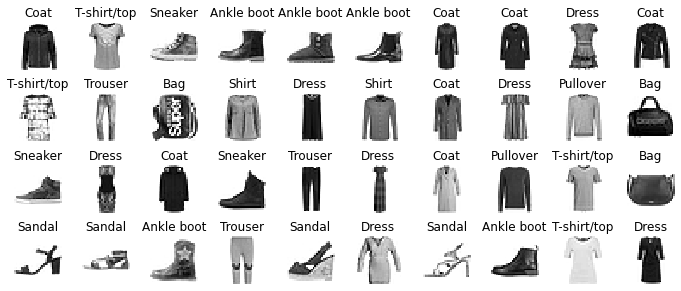

In [45]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2023-06-19 18:17:34.614141: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [14]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [15]:
weights

array([[-0.06773357,  0.02340043,  0.07128091, ...,  0.06644994,
        -0.01376658, -0.03447064],
       [ 0.01453958,  0.07141025, -0.07186852, ...,  0.05279177,
         0.06875758, -0.06069569],
       [-0.06650984,  0.01062194, -0.00663711, ...,  0.00503673,
         0.05356432,  0.00204977],
       ...,
       [-0.0585401 ,  0.01917696, -0.03046031, ..., -0.01054079,
        -0.06808715,  0.02322618],
       [ 0.03620053,  0.03496856, -0.04130156, ...,  0.0549615 ,
         0.05447896,  0.05428568],
       [ 0.01119033, -0.03295511,  0.05012205, ...,  0.02963068,
        -0.06744539, -0.03292545]], dtype=float32)

In [16]:
print(weights.shape)

(784, 300)


In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [19]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7086 - accuracy: 0.7675 - val_loss: 0.5207 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4898 - accuracy: 0.8277 - val_loss: 0.4372 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4458 - accuracy: 0.8428 - val_loss: 0.5452 - val_accuracy: 0.7964
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4194 - accuracy: 0.8536 - val_loss: 0.3982 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4000 - accuracy: 0.8604 - val_loss: 0.3814 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3810 - accuracy: 0.8654 - val_loss: 0.3742 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3682 - accuracy: 0.8703 - val_loss: 0.3658 - val_accuracy:

In [20]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [21]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

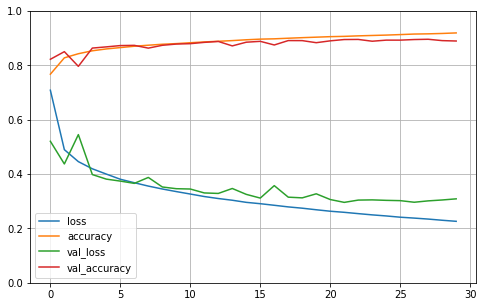

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8774


[0.3467109203338623, 0.8773999810218811]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 89ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 34ms/step


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

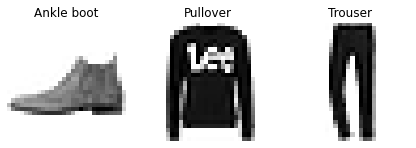

In [28]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


In [46]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)



model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.add(BatchNormalization())
model2.add(Activation("sigmoid"))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 10)                0         
                                                        

In [31]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [32]:
history2 = model2.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7525 - accuracy: 0.7897 - val_loss: 0.5098 - val_accuracy: 0.8512
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5415 - accuracy: 0.8312 - val_loss: 0.4518 - val_accuracy: 0.8532
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4942 - accuracy: 0.8401 - val_loss: 0.4387 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4551 - accuracy: 0.8522 - val_loss: 0.3812 - val_accuracy: 0.8778
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4235 - accuracy: 0.8617 - val_loss: 0.3769 - val_accuracy: 0.8752
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4071 - accuracy: 0.8643 - val_loss: 0.3741 - val_accuracy: 0.8750
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3917 - accuracy: 0.8711 - val_loss: 0.3856 - val_accuracy:

In [45]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.8863


[0.35078197717666626, 0.8863000273704529]

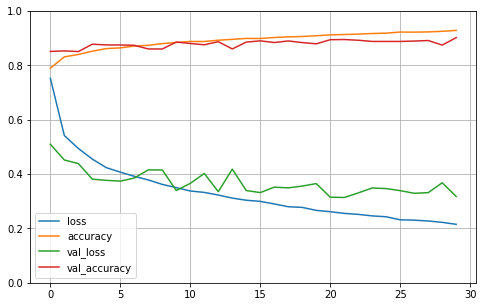

In [33]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input

In [40]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [43]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
history3 = model3.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4839 - accuracy: 0.8260 - val_loss: 0.3600 - val_accuracy: 0.8708
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3639 - accuracy: 0.8666 - val_loss: 0.3785 - val_accuracy: 0.8672
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3298 - accuracy: 0.8767 - val_loss: 0.3317 - val_accuracy: 0.8802
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3040 - accuracy: 0.8871 - val_loss: 0.3099 - val_accuracy: 0.8862
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2869 - accuracy: 0.8920 - val_loss: 0.3021 - val_accuracy: 0.8854
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2718 - accuracy: 0.8989 - val_loss: 0.3155 - val_accuracy: 0.8872
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2604 - accuracy: 0.9023 - val_loss: 0.3005 - val_accuracy:

In [12]:
model3.evaluate(X_test, y_test)

NameError: name 'model3' is not defined

In [62]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model5 = Sequential()
model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                  strides=1, padding='same', input_shape=(28,28,1)))
model5.add(BatchNormalization())

model5.add(Conv2D(filters=32, kernel_size=(3, 3), 
                  activation= keras.layers.LeakyReLU(alpha=0.01),
                  strides=1, padding='valid'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
                  strides=1, padding='same'))
model5.add(MaxPool2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))

    
model5.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
                  strides=1, padding='valid'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Flatten())
model5.add(Dense(512, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(128, activation=keras.layers.LeakyReLU(alpha=0.01)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

In [69]:
model5.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [71]:
history5 = model5.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 235s 137ms/step - loss: 0.3670 - accuracy: 0.8711 - val_loss: 0.3274 - val_accuracy: 0.8736
Epoch 2/5
1719/1719 [==============================] - 256s 149ms/step - loss: 0.2977 - accuracy: 0.8948 - val_loss: 0.2254 - val_accuracy: 0.9160
Epoch 3/5
1719/1719 [==============================] - 253s 147ms/step - loss: 0.2653 - accuracy: 0.9052 - val_loss: 0.2200 - val_accuracy: 0.9164
Epoch 4/5
1719/1719 [==============================] - 258s 150ms/step - loss: 0.2410 - accuracy: 0.9155 - val_loss: 0.1919 - val_accuracy: 0.9314
Epoch 5/5
1719/1719 [==============================] - 257s 149ms/step - loss: 0.2147 - accuracy: 0.9235 - val_loss: 0.2014 - val_accuracy: 0.9250


In [72]:
model5.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2245 - accuracy: 0.9206


[0.22453804314136505, 0.9205999970436096]

In [74]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model6 = Sequential()
model6.add(Conv2D(filters=128, kernel_size=(3, 3), 
                  activation=keras.layers.LeakyReLU(alpha=0.3), 
                  strides=1, padding='same', input_shape=(28,28,1)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.25))
model6.add(Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))
model6.add(Dense(10, activation='softmax'))

In [78]:
model6.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [79]:
history6 = model6.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 1045s 608ms/step - loss: 0.4776 - accuracy: 0.8312 - val_loss: 0.3423 - val_accuracy: 0.8772
Epoch 2/5
1719/1719 [==============================] - 1040s 605ms/step - loss: 0.3399 - accuracy: 0.8755 - val_loss: 0.3038 - val_accuracy: 0.8896
Epoch 3/5
1719/1719 [==============================] - 955s 556ms/step - loss: 0.2919 - accuracy: 0.8938 - val_loss: 0.2986 - val_accuracy: 0.8920
Epoch 4/5
1719/1719 [==============================] - 953s 554ms/step - loss: 0.2531 - accuracy: 0.9064 - val_loss: 0.2733 - val_accuracy: 0.8986
Epoch 5/5
1719/1719 [==============================] - 967s 562ms/step - loss: 0.2182 - accuracy: 0.9197 - val_loss: 0.2876 - val_accuracy: 0.8988


In [80]:
model6.evaluate(X_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.3127 - accuracy: 0.8880


[0.31268593668937683, 0.8880000114440918]

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model7 = Sequential()
model7.add(Conv2D(filters=128, kernel_size=(3, 3), 
                  activation=keras.layers.LeakyReLU(alpha=0.3), 
                  strides=1, padding='same', input_shape=(28,28,1)))
model7.add(MaxPool2D((2,2)))
model7.add(Conv2D(filters = 128, kernel_size=(3,3), activation=keras.layers.LeakyReLU(alpha=0.1),
                 strides = 1, padding='same'))
model7.add(Flatten())
model7.add(Dropout(0.5))
model7.add(Dense(10, activation = 'softmax'))

In [93]:
model7.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [94]:
history7 = model7.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 81s 47ms/step - loss: 0.4074 - accuracy: 0.8543 - val_loss: 0.2914 - val_accuracy: 0.8962
Epoch 2/5
1719/1719 [==============================] - 79s 46ms/step - loss: 0.3038 - accuracy: 0.8925 - val_loss: 0.2912 - val_accuracy: 0.8984
Epoch 3/5
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2712 - accuracy: 0.9022 - val_loss: 0.2677 - val_accuracy: 0.9056
Epoch 4/5
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2513 - accuracy: 0.9098 - val_loss: 0.2438 - val_accuracy: 0.9154
Epoch 5/5
1719/1719 [==============================] - 82s 48ms/step - loss: 0.2391 - accuracy: 0.9150 - val_loss: 0.2417 - val_accuracy: 0.9118


In [95]:
model7.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2683 - accuracy: 0.9057


[0.2683337330818176, 0.9057000279426575]

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [104]:
model8 = Sequential()
model8.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', 
                  strides=1, padding='same', input_shape=(28,28,1)))
model8.add(BatchNormalization())

model8.add(Conv2D(filters=32, kernel_size=(3, 3), 
                  activation= keras.layers.LeakyReLU(alpha=0.01),
                  strides=1, padding='valid'))
model8.add(BatchNormalization())
model8.add(Dropout(0.1))

model8.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
                  strides=1, padding='same'))
model8.add(MaxPool2D(pool_size=(2, 2)))
model8.add(Dropout(0.1))

    
model8.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', 
                  strides=1, padding='valid'))
model8.add(BatchNormalization())
model8.add(Dropout(0.2))

model8.add(Flatten())
model8.add(Dense(512, activation='relu'))
model8.add(BatchNormalization())
model8.add(Dropout(0.1))
model8.add(Dense(128, activation=keras.layers.LeakyReLU(alpha=0.01)))
model8.add(BatchNormalization())
model8.add(Dropout(0.1))

model8.add(Dense(10, activation='softmax'))

In [105]:
model8.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [106]:
history8 = model8.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 240s 136ms/step - loss: 0.3791 - accuracy: 0.8641 - val_loss: 0.2450 - val_accuracy: 0.9066
Epoch 2/5
1719/1719 [==============================] - 236s 137ms/step - loss: 0.2523 - accuracy: 0.9084 - val_loss: 0.2255 - val_accuracy: 0.9112
Epoch 3/5
1719/1719 [==============================] - 229s 133ms/step - loss: 0.2106 - accuracy: 0.9236 - val_loss: 0.2002 - val_accuracy: 0.9272
Epoch 4/5
1719/1719 [==============================] - 233s 136ms/step - loss: 0.1770 - accuracy: 0.9358 - val_loss: 0.2096 - val_accuracy: 0.9254
Epoch 5/5
1719/1719 [==============================] - 231s 134ms/step - loss: 0.1499 - accuracy: 0.9443 - val_loss: 0.1819 - val_accuracy: 0.9362


In [108]:
model8.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.2133 - accuracy: 0.9252


[0.2132585644721985, 0.9251999855041504]